<a href="https://colab.research.google.com/github/BrightToughson/SMS-Spam-Detection---Group-9/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/sms+spam+collection/SMSSpamCollection.csv')

In [3]:
df.sample(5)

,label,message
2413,spam,I don't know u and u don't know me. Send CHAT ...
75,ham,I am waiting machan. Call me once you free.
4688,ham,Eatin my lunch...
4933,ham,Match started.india &lt;#&gt; for 2
3766,spam,Someone U know has asked our dating service 2 ...


In [4]:
df.shape

(5574, 2)

In [5]:
# 1. Data Cleaning
# 2. Exporatory Data Analysis
# 3. Text Preprocessing
# 4. Mobel Building
# 5. Evaluation
# 6. Improvement
# 7. streamlit
# 8. Deployment

***1. Data Cleaning***

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5574 non-null   object
 1   message  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['label'] = encoder.fit_transform(df['label'])

In [9]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# missing valuse
df.isnull().sum()

,0
label,0
message,0


In [11]:
# check for duplicate values
df.duplicated().sum()

np.int64(414)

In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(5160, 2)

***EDA***

In [15]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['label'].value_counts()

,count
label,
0,4518
1,642


([<matplotlib.patches.Wedge at 0x7efab6c463c0>,
 [Text(-1.017034638542128, 0.41909491049818676, 'ham'),
  Text(1.0170347751005293, -0.41909457910621567, 'spam')],
 [Text(-0.5547461664775243, 0.22859722390810183, '87.56'),
  Text(0.554746240963925, -0.22859704314884488, '12.44')])

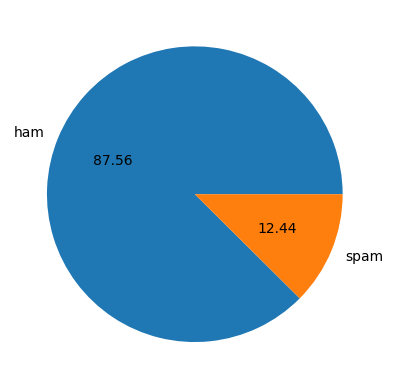

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

In [18]:
# Data is imbalanced
import nltk

In [19]:
!pip install nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
df['num_characters'] = df['message'].apply(len)

In [22]:
df.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
nltk.download('punkt_tab')
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [24]:
df.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,label,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5160.000000,5160.000000,5160.000000
mean,79.139535,18.581395,1.970543
std,58.289027,13.390781,1.455918
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Ham messages
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4518.000000,4518.000000,4518.000000
mean,70.858787,17.282205,1.827579
std,56.584015,13.572746,1.394245
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# Spam
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,642.000000,642.000000,642.000000
mean,137.414330,27.724299,2.976636
std,29.975596,7.028380,1.484527
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [33]:
# Histogram
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

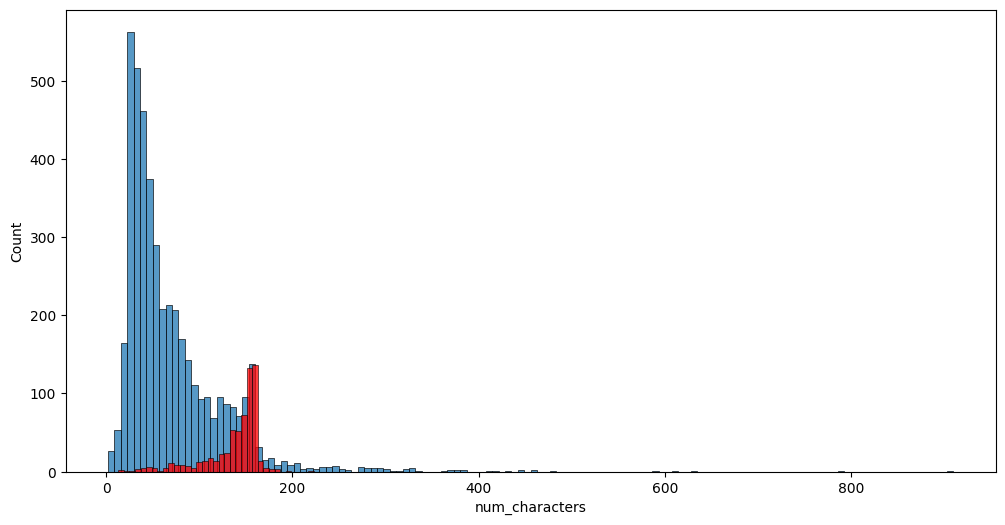

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

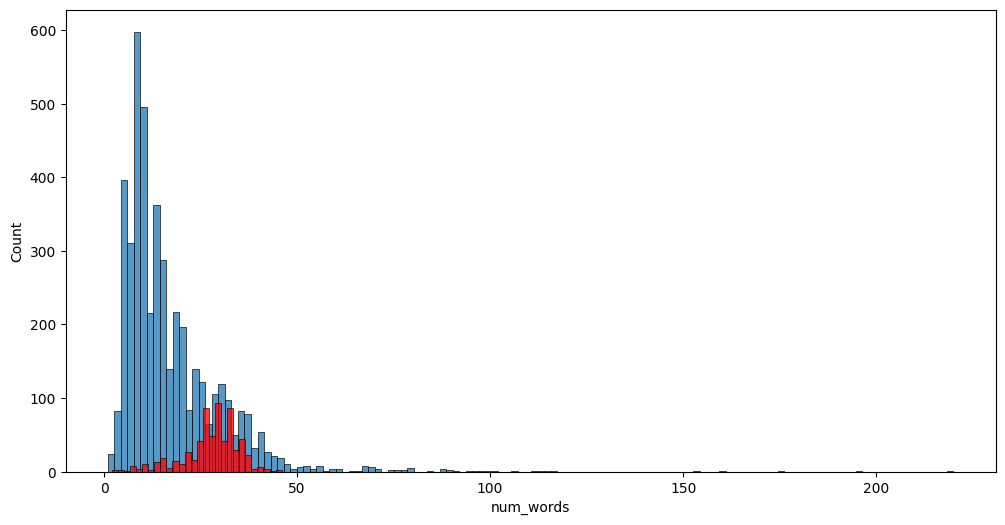

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'], color='red')

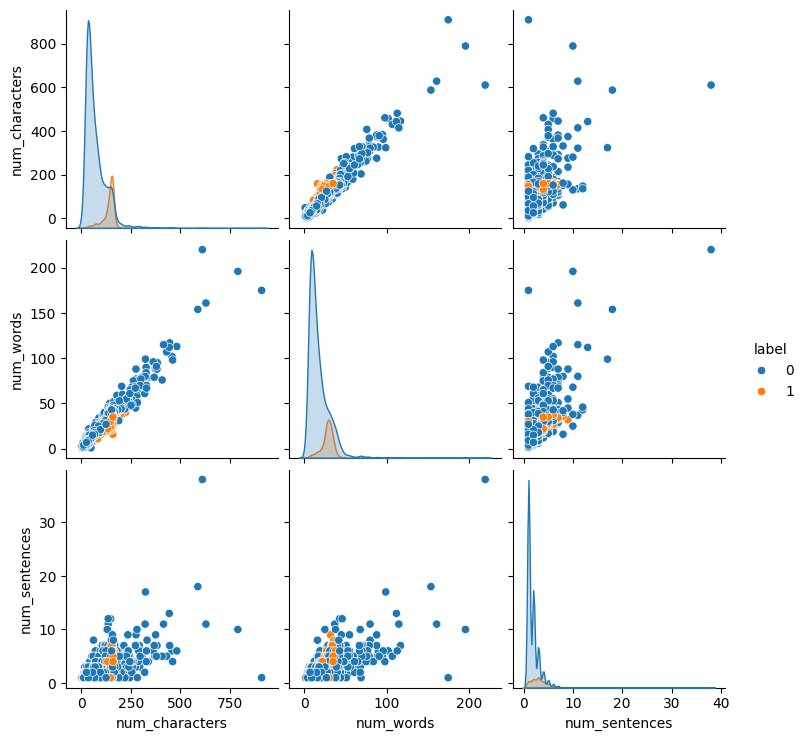

In [38]:
sns.pairplot(df, hue='label')

<Axes: >

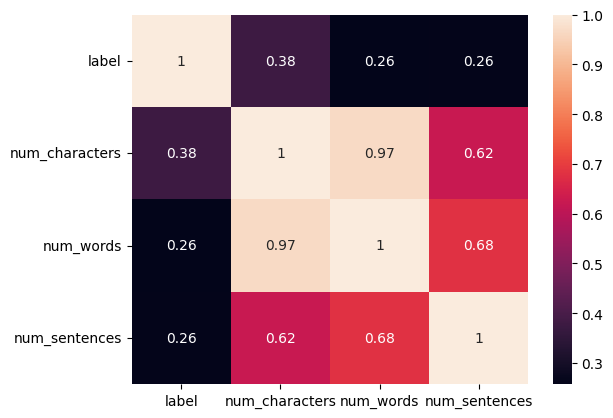

In [41]:
sns.heatmap(df[['label', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

***3. Data Preprocessing***
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [71]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)


    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [77]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [75]:
df['message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [70]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [79]:
df['transformed_text'] = df['message'].apply(transform_text)

In [80]:
df.head()

,label,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [81]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [82]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

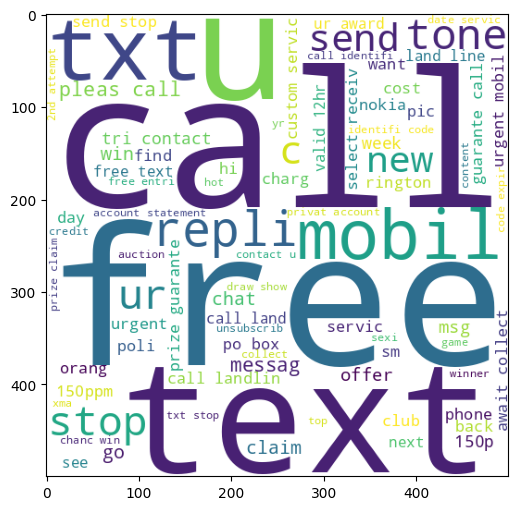

In [83]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [85]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

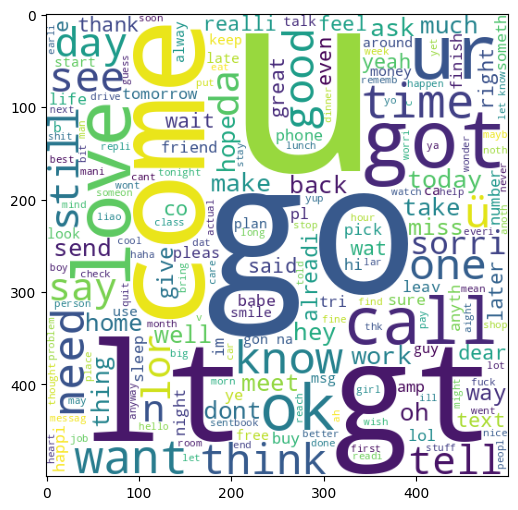

In [86]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [87]:
df.head()

,label,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [89]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [90]:
len(spam_corpus)

9808

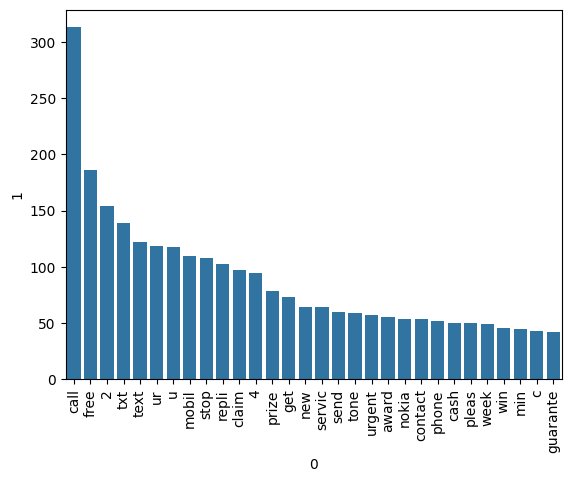

In [92]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [94]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [95]:
len(ham_corpus)

35937

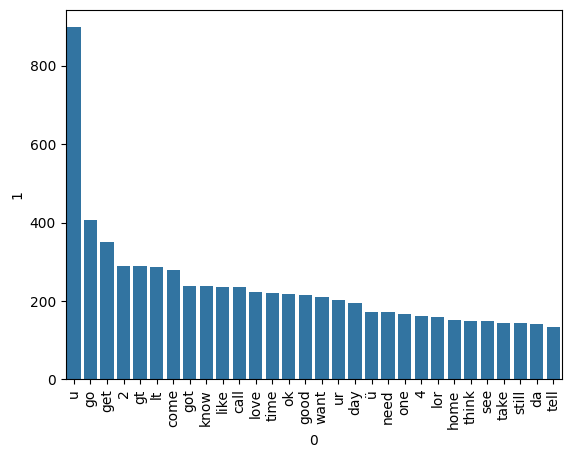

In [97]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [98]:
# Text Vectorization
# using Bag of Words
df.head()

,label,message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


***Model Building***

In [99]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [100]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [102]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [101]:
X.shape

(5160, 3000)

In [104]:
y = df['label'].values

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [107]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [108]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [109]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.873062015503876
[[803 113]
 [ 18  98]]
0.46445497630331756


In [110]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9767441860465116
[[916   0]
 [ 24  92]]
1.0


In [111]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825581395348837
[[912   4]
 [ 14 102]]
0.9622641509433962


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [113]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [114]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [115]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [116]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748062015503876, 0.95)

In [117]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748062015503876
Precision -  0.95
For  KN
Accuracy -  0.936046511627907
Precision -  0.9807692307692307
For  NB
Accuracy -  0.9767441860465116
Precision -  1.0
For  DT
Accuracy -  0.9486434108527132
Precision -  0.8888888888888888
For  LR
Accuracy -  0.9534883720930233
Precision -  0.8863636363636364
For  RF
Accuracy -  0.9728682170542635
Precision -  1.0
For  AdaBoost
Accuracy -  0.939922480620155
Precision -  0.875
For  BgC
Accuracy -  0.9680232558139535
Precision -  0.8952380952380953
For  ETC
Accuracy -  0.9796511627906976
Precision -  0.9611650485436893
For  GBDT
Accuracy -  0.9544573643410853
Precision -  0.96
For  xgb
Accuracy -  0.9689922480620154
Precision -  0.92


In [118]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [119]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.976744,1.000000
5,RF,0.972868,1.000000
1,KN,0.936047,0.980769
8,ETC,0.979651,0.961165
9,GBDT,0.954457,0.960000
0,SVC,0.974806,0.950000
10,xgb,0.968992,0.920000
7,BgC,0.968023,0.895238
3,DT,0.948643,0.888889
4,LR,0.953488,0.886364


In [120]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [121]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.976744
1,RF,Accuracy,0.972868
2,KN,Accuracy,0.936047
3,ETC,Accuracy,0.979651
4,GBDT,Accuracy,0.954457
5,SVC,Accuracy,0.974806
6,xgb,Accuracy,0.968992
7,BgC,Accuracy,0.968023
8,DT,Accuracy,0.948643
9,LR,Accuracy,0.953488


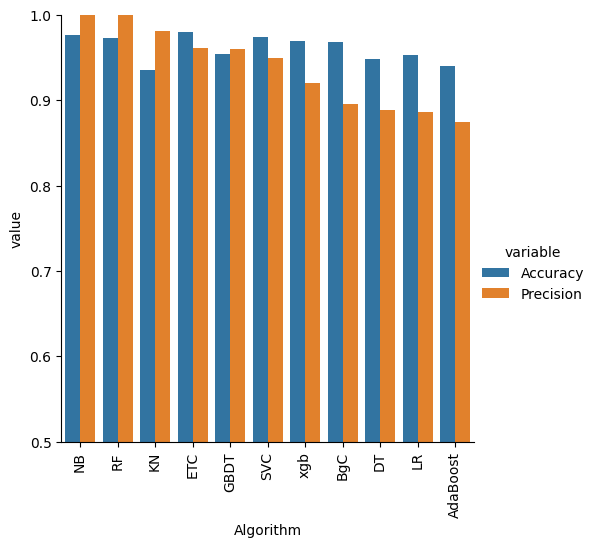

In [122]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [123]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [124]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [125]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [126]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [127]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [128]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [129]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.976744,1.000000,0.976744,1.000000,0.976744,1.000000,0.976744,1.000000
1,RF,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000,0.972868,1.000000
2,KN,0.936047,0.980769,0.936047,0.980769,0.936047,0.980769,0.936047,0.980769
3,ETC,0.979651,0.961165,0.979651,0.961165,0.979651,0.961165,0.979651,0.961165
4,GBDT,0.954457,0.960000,0.954457,0.960000,0.954457,0.960000,0.954457,0.960000
5,SVC,0.974806,0.950000,0.974806,0.950000,0.974806,0.950000,0.974806,0.950000
6,xgb,0.968992,0.920000,0.968992,0.920000,0.968992,0.920000,0.968992,0.920000
7,BgC,0.968023,0.895238,0.968023,0.895238,0.968023,0.895238,0.968023,0.895238
8,DT,0.948643,0.888889,0.948643,0.888889,0.948643,0.888889,0.948643,0.888889
9,LR,0.953488,0.886364,0.953488,0.886364,0.953488,0.886364,0.953488,0.886364


In [130]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [131]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [132]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [133]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796511627906976
Precision 0.9702970297029703


In [134]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [135]:
from sklearn.ensemble import StackingClassifier

In [136]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [137]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825581395348837
Precision 0.9622641509433962


In [138]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))